# Esercitazione

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

## Comprensione del codice

### Esercizio 1

In [6]:
a, b = [4, 8, 12, 16], [3, 2, 6]
out = np.zeros((len(a), len(b)))
for i, v_a in enumerate(a):
    for j, v_b in enumerate(b):
        if v_a % v_b == 0:
            out[i,j] = 1

In [7]:
print(out)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


### Esercizio 2

In [9]:
class A:
    def __init__(self, x):
        self.x = x
    def execute(self):
        return np.power(self.x, 2)
class B(A):
    def execute(self):
        return np.power(self.x, 4)
a, b = A(3), B(2)

In [13]:
print(a.execute() - b.execute())

-7


### Esercizio 3

In [21]:
a = {'x': lambda x: 2*x, 'y': lambda y: y / 2}
k = [a['x'](i) - a['y'](i) for i in range(6)]

In [22]:
print(k)

[0.0, 1.5, 3.0, 4.5, 6.0, 7.5]


## Programmazione

### Fibonacci
Definire un programma iterativo che generi la serie di Fibonacci fino a un valore $N$.

Se ricorda che la struttura generale della serie è:

$$
f_n = f_{n-1} + f_{n-2}
$$

Mostrare poi in un grafico la funzione generata dalla serie e la sua cumulata

In [25]:
N = 2000
x, y = 0, 1
fibo = [x, y]
while True:
    n = fibo[-1] + fibo[-2]
    if n < N:
        fibo.append(n)
    else:
        break

In [27]:
import matplotlib.pyplot as plt

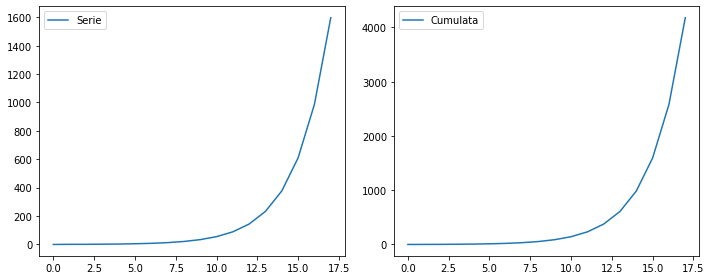

In [28]:
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].plot(fibo, label='Serie')
ax[1].plot(np.cumsum(fibo), label='Cumulata')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

### Edit Distance
**Problema:** date due stringhe $a$ e $b$, individuare una strategia per calcolare il numero minimo di operazioni necessario a trasformare $a$ in $b$, avendo come possibili operazioni l'inserimento di un carattere, la cancellazione di un carattere, e la sostituzione di un carattere.

<table>
    <tr><td></td><td>#</td><td>c</td><td>a</td><td>s</td><td>t</td><td>o</td></tr>
    <tr><td>#</td><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td></tr>
    <tr><td>c</td><td>1</td><td></td><td></td><td></td><td></td><td></td></tr>
    <tr><td>a</td><td>2</td><td></td><td></td><td></td><td></td><td></td></tr>
    <tr><td>s</td><td>3</td><td></td><td></td><td></td><td></td><td></td></tr>
    <tr><td>a</td><td>4</td><td></td><td></td><td></td><td></td><td></td></tr>
</table>

$E(i, j) = \min \{E(i-1, j) + 1; E(i, j-1) + 1; E(i-1,j-1) + k\}$, where 

$$
k = \left \{ \begin{matrix}
    1 & if\ s_1(i) \neq s_2(j)\\
    0 & otherwise 
    \end{matrix}
    \right .
$$

In [ ]:
a = 'cane'
b = 'case'

### Implement KMeans from scratch
Try a naive implementation of [KMeans](https://en.wikipedia.org/wiki/K-means_clustering) 

In [5]:
from sklearn.datasets import make_blobs

In [24]:
k = 3
X, y = make_blobs(n_samples=100, centers=k, n_features=2, random_state=0, cluster_std=.4)

In [25]:
X[:3]

array([[2.28590385, 0.81434416],
       [0.61808345, 4.45854833],
       [2.43416831, 0.83565962]])

In [26]:
import matplotlib.pyplot as plt

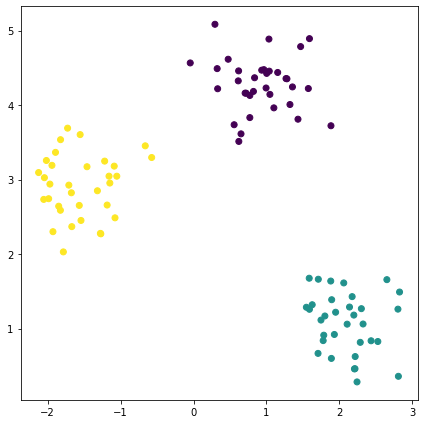

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=y)
plt.tight_layout()
plt.show()